Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Configuración de Spark completada.
Número de archivos procesados: 1
Procesamiento de la imagen completado.


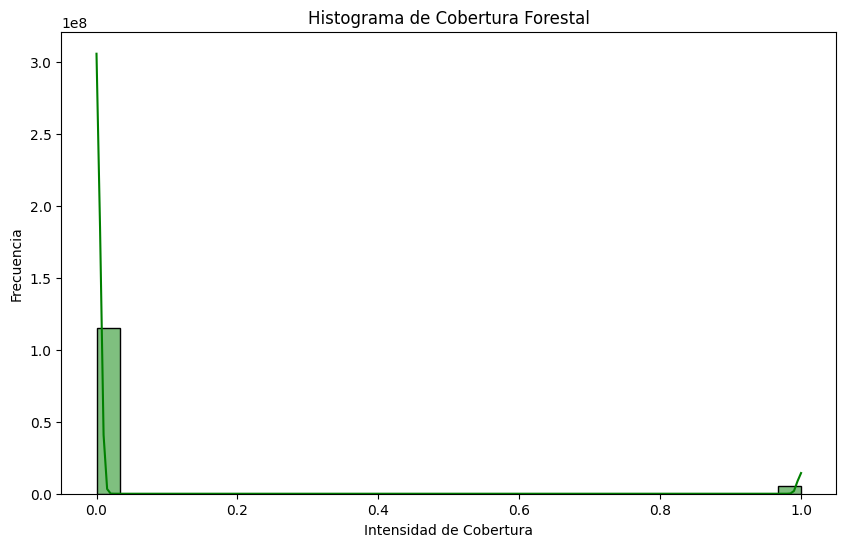

In [ ]:
# prompt: tengo la imagen de earth engine como Costa_Rica.tif in my Drive puedes agregarlo al codigo

import numpy as np
import rasterio
from rasterio.transform import from_origin
from pyspark import SparkContext, SparkConf
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your GeoTIFF file in Google Drive
geotiff_path = '/content/drive/MyDrive/EarthEngine/Copy of Costa_Rica.tif' # Reemplaza con la ruta correcta

# =============================
# 2. Configuración de Spark
# =============================
conf = SparkConf().setAppName("MonitoreoDeforestacion").setMaster("local[*]")
sc = SparkContext.getOrCreate()
print("Configuración de Spark completada.")


# =============================
# 4. Almacenamiento en HDFS (Si necesitas usar HDFS, descomenta este bloque)
# =============================
# try:
#     subprocess.run(["hdfs", "dfs", "-mkdir", "-p", "/user/deforestacion/"])
#     subprocess.run(["hdfs", "dfs", "-put", geotiff_path, "/user/deforestacion/"])
#     print("Archivo almacenado en HDFS correctamente.")
# except Exception as e:
#     print(f"Error al almacenar en HDFS: {str(e)}")


# =============================
# 5. Procesamiento de Datos con Spark (Ajustado para leer desde Google Drive)
# =============================
def procesar_imagen(file_path):
    try:
        with rasterio.open(file_path) as src:
            datos = src.read(1)  # Lee la primera banda
            print(f"Número de archivos procesados: 1") # Corregido
            print("Procesamiento de la imagen completado.")
            return datos
    except Exception as e:
        print(f"Error en el procesamiento con Spark: {str(e)}")
        return None

# Obtener los datos procesados
datos_procesados = procesar_imagen(geotiff_path)

# =============================
# 6. Visualización de Datos
# =============================
if datos_procesados is not None:
    plt.figure(figsize=(10, 6))
    sns.histplot(datos_procesados.flatten(), bins=30, kde=True, color='green')
    plt.title("Histograma de Cobertura Forestal")
    plt.xlabel("Intensidad de Cobertura")
    plt.ylabel("Frecuencia")
    plt.show()

    plt.figure(figsize=(8, 8))
    sns.heatmap(datos_procesados, cmap="YlGnBu")
    plt.title("Mapa de Calor de la Cobertura Forestal")
    plt.show()
else:
    print("No se pudieron procesar los datos de la imagen.")

# =============================
# 7. Finalización y Limpieza
# =============================
sc.stop()
print("Contexto de Spark finalizado.")
